# Análise RFV (Recência Frequência Valor) - Warehouse Sales Data

Neste projeto será realizada uma análise do tipo RFV (Recência, Frequência e Valor) com dados que encontrei neste video no Youtube do canal [Jie Jenn](https://www.youtube.com/watch?v=9wxWrERZvss).

![img](https://images.unsplash.com/photo-1624927637280-f033784c1279?q=80&w=2074&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

## 1.1. Os dados, o problema e os objetivos

A análise RFV é uma técnica de segmentação de clientes muito utilizada em marketing e gestão de relacionamento com clientes (CRM). Ela tem base em três métricas:

- Recência (Recency): O tempo decorrido entre a última compra ou interação de um cliente com a empresa. Clientes mais recentes têm tendência de fazer mais compras do que clientes que não interagem há muito tempo.
- Frequência (Frequency): É o número total de compras ou interações do cliente com a empresa. Clientes com maior frequência de compra representam aqueles que são fiéis à empresa.
- Valor monetário (Monetary value): Refere-se ao gasto total ou à média de gastos do cliente em suas compras na empresa. Clientes que têm maior média de valores gastos na empresa contribuem de maneira significante com os lucros dela.

Combinando essas três métricas é possível de várias maneiras segmentar os clientes e, a partir disso, criar campanhas de marketing, estratégias de relacionamento e campanhas focadas em cada segmento de cliente específico.

### Estrutura do dataset
Os dados são de uma rede varejista fictícia, as colunas estão organizadas dessa forma:

|Coluna|Descrição|
|-----|----------|
|**OrderNumber**|ID do pedido|
|**Sales Channel**|Canal de vendas do pedido|
|**WarehouseCode**|ID do armazém do pedido|
|**ProcuredDate**|Data de reserva do pedido|
|**OrderDate**|Data da realizaçãod do pedido|
|**ShipDate**|Data de envio|
|**DeliveryDate**|Data de entrega|
|**CurrencyCode**|Moeda utilizada na transação|
|**_SalesTeamID**|ID do time de vendas|
|**_CustomerID**|ID do cliente|
|**_StoreID**|ID da loja|
|**_ProductID**|ID do produto|
|**Order Quantity**|Quantidade de itens no pedido|
|**Discount Applied**|Desconto aplicado na compra|
|**Unit Price**|Preço unitário do produto|
|**Unit Cost**|Custo unitário|

### Objetivos
Com este conjunto de dados em mãos, meu objetivo será realizar a análise RFV com uso do algoritmo KMeans e identificar uma segmentação de clientes para ser trabalhada pelo setor de marketing da empresa.

## 1.2. Importação das bibliotecas e carregamento dos dados

In [224]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
my_palette = sns.color_palette(["#4E7CFF", "#7033FF", "#F65164", "#22C0FF", "#DC7653"])
sns.set_palette(my_palette)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

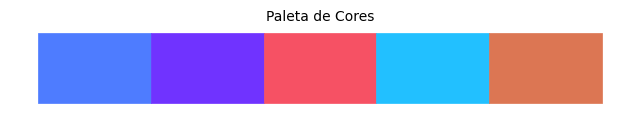

In [225]:
plt.figure(figsize=(8, 1))

for i, cor in enumerate(my_palette):
    plt.fill_between([i, i + 1], 0, 1, color=cor)

plt.axis('off')
plt.title('Paleta de Cores', fontsize = 10)
plt.show()

In [226]:
df = pd.read_csv("../data/raw/dados.csv")

# 2. Estrutura dos dados

In [228]:
df.shape

(7991, 16)

In [229]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,5/31/2018,6/14/2018,6/19/2018,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,5/31/2018,6/22/2018,7/2/2018,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,5/31/2018,6/21/2018,7/1/2018,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,5/31/2018,6/2/2018,6/7/2018,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,5/31/2018,6/16/2018,6/26/2018,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [230]:
df.tail()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
7986,SO - 0008087,In-Store,WARE-MKL1006,9/26/2020,12/30/2020,1/7/2021,1/14/2021,USD,9,41,339,29,1,0.075,234.5,121.940
7987,SO - 0008088,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/2/2021,1/4/2021,USD,14,29,202,3,6,0.050,3202.6,1921.560
7988,SO - 0008089,Online,WARE-UHY1004,9/26/2020,12/30/2020,1/23/2021,1/26/2021,USD,14,32,241,35,5,0.200,3825.7,2792.761
7989,SO - 0008090,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/20/2021,1/25/2021,USD,20,42,112,36,8,0.100,1072.0,804.000
7990,SO - 0008091,In-Store,WARE-UHY1004,9/26/2020,12/30/2020,1/13/2021,1/19/2021,USD,6,41,237,43,5,0.075,2211.0,1370.820


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Price        7991 non-null   float64
 15  Unit Cost         7991 non-null   float64
dtypes: float64(3), int64(5), object(8)
memory 

# 3. Limpeza e manipulação dos dados

## 3.1. Nulos e duplicatas

In [234]:
print(f"O dataset tem {df.isna().sum().sum()} dados nulos")

O dataset tem 0 dados nulos


In [235]:
print(f"O dataset tem {df.duplicated().sum()} dados duplicados")

O dataset tem 0 dados duplicados


## 3.2. Manipulação dos dados

### Conversões para datetime

In [238]:
df["ProcuredDate"] = pd.to_datetime(df["ProcuredDate"])
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["ShipDate"] = pd.to_datetime(df["ShipDate"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   object        
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Price        7991 n

### Separação dos dados

In [240]:
# Colunas que serão utilizadas

colunas_rfv = ["_CustomerID", "OrderDate", "Order Quantity", "Discount Applied", "Unit Price", "Unit Cost"]
df_rfv = df[colunas_rfv].copy()
df_rfv.head()

,_CustomerID,OrderDate,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,15,2018-05-31,5,0.075,1963.1,1001.181
1,20,2018-05-31,3,0.075,3939.6,3348.660
2,16,2018-05-31,1,0.050,1775.5,781.220
3,48,2018-05-31,8,0.075,2324.9,1464.687
4,49,2018-05-31,8,0.100,1822.4,1476.144


In [241]:
# Criação da coluna 'Revenue'

df_rfv["Revenue"] = ((df_rfv["Unit Price"] - (df_rfv["Unit Price"] * df_rfv["Discount Applied"]) - df_rfv["Unit Cost"])) * df_rfv["Order Quantity"]
df_rfv.head()

,_CustomerID,OrderDate,Order Quantity,Discount Applied,Unit Price,Unit Cost,Revenue
0,15,2018-05-31,5,0.075,1963.1,1001.181,4073.4325
1,20,2018-05-31,3,0.075,3939.6,3348.660,886.4100
2,16,2018-05-31,1,0.050,1775.5,781.220,905.5050
3,48,2018-05-31,8,0.075,2324.9,1464.687,5486.7640
4,49,2018-05-31,8,0.100,1822.4,1476.144,1312.1280


In [242]:
# Deixando um .csv com as modificações para futuros trabalhos

df_rfv.to_csv("../data/processed/dados_rfv.csv", index = False)

### Ajustes para a aplicação da análise RFV

#### Recência

In [245]:
df_recencia = (
    df_rfv[["_CustomerID", "OrderDate"]]
    .groupby("_CustomerID")["OrderDate"]
    .agg("max")
    .reset_index()
)

df_recencia.head()

,_CustomerID,OrderDate
0,1,2020-12-23
1,2,2020-12-23
2,3,2020-12-22
3,4,2020-12-27
4,5,2020-12-02


Agrupando o 'CustomerID' por 'OrderDate' agregado pelo seu valor máximo, é possível identificar a data da última compra do cliente. O próximo passo é calcular a recência em dias.

In [247]:
cur_time = df_recencia["OrderDate"].max()

def days_diff(cur_time, datetime_val):
    return (cur_time - datetime_val).days

In [248]:
df_recencia["Recencia"] = df_recencia["OrderDate"].apply(lambda datetime_val: days_diff(cur_time, datetime_val))
df_recencia.head()

,_CustomerID,OrderDate,Recencia
0,1,2020-12-23,7
1,2,2020-12-23,7
2,3,2020-12-22,8
3,4,2020-12-27,3
4,5,2020-12-02,28


In [249]:
# "OrderDate" se tornou uma coluna desnecessária, então vou remover

df_recencia = df_recencia.drop("OrderDate", axis = 1)

In [250]:
df_recencia.Recencia.describe()

count    50.000000
mean      5.100000
std       5.395576
min       0.000000
25%       2.000000
50%       3.000000
75%       7.000000
max      28.000000
Name: Recencia, dtype: float64

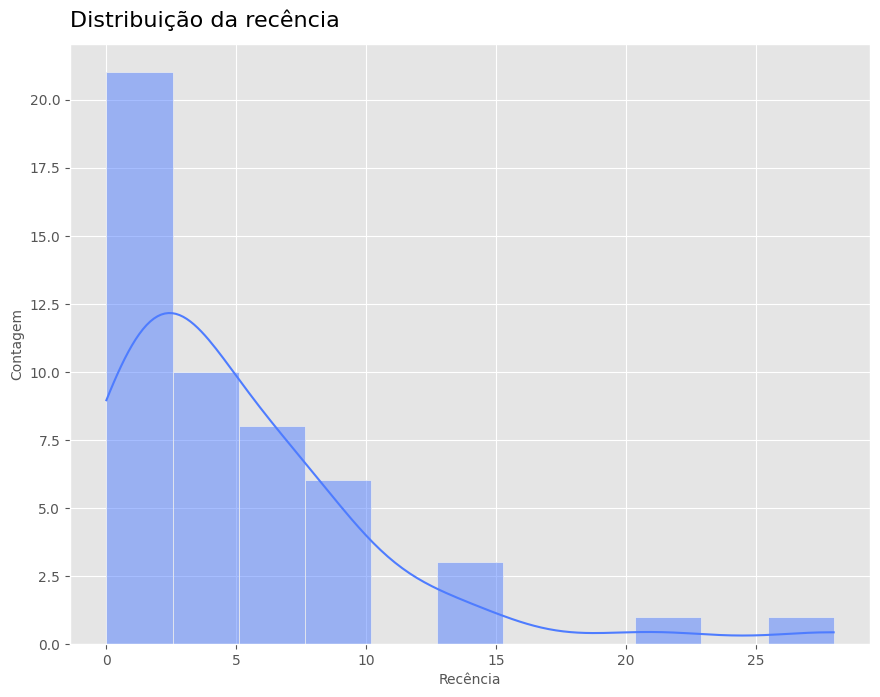

In [251]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.histplot(df_recencia, x = "Recencia", kde = True)
ax.set_title("Distribuição da recência", loc = "left", fontsize = 16, pad = 12)
ax.set_xlabel("Recência", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

#### Sobre a recência

Os valores de recência mais recorrentes estão entre 0 e 5 dias, mas temos clientes que estão até com 25 dias sem realizar nenhuma compra na empresa. Provavelmente, estes estão em um ponto de churn, ou seja, de abandonar a empresa. Vale ressaltar que é natural que ao longo do tempo o número de compras caia.

#### Frequência e Valor

In [254]:
df_fv = df_rfv[["_CustomerID", "Order Quantity", "Revenue"]]

df_fv = (
    df_fv.groupby("_CustomerID")[["Order Quantity", "Revenue"]]
    .agg({"Order Quantity": "count", "Revenue": "mean"})
    .reset_index()
)

df_fv = df_fv.rename(columns = {"Order Quantity": "Frequencia", 
                                "Revenue": "Valor"})

df_fv["Valor"] = df_fv["Valor"].round(2)

df_fv.head()

,_CustomerID,Frequencia,Valor
0,1,152,2210.09
1,2,135,2425.25
2,3,181,2575.80
3,4,167,3155.58
4,5,159,2802.72


Ao agrupar '_CustomerID' pela contagem de 'Order Quantity', foi possível contar quantas vezes cada ID realizou uma compra, ou seja, a Frequência. E ao agrupar pela média de 'Revenue', conseguimos nosso Valor monetário. Com isso, o próximo passo é unir os dataframes.

In [256]:
df_modelo = df_recencia.merge(df_fv, on = "_CustomerID", how = "left")
df_modelo = df_modelo.fillna(0)
df_modelo.head()

,_CustomerID,Recencia,Frequencia,Valor
0,1,7,152,2210.09
1,2,7,135,2425.25
2,3,8,181,2575.80
3,4,3,167,3155.58
4,5,28,159,2802.72


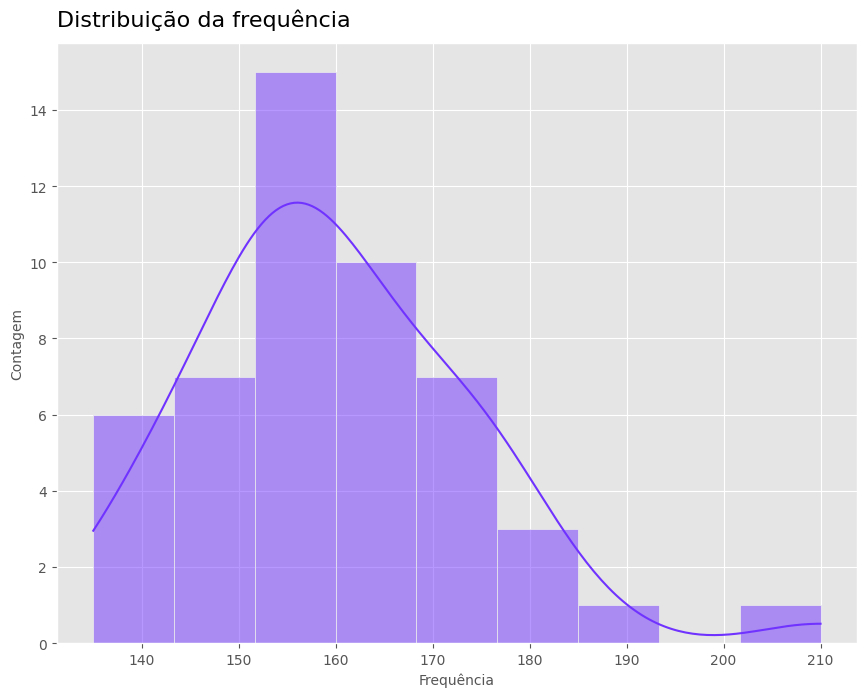

In [257]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.histplot(df_modelo, x = "Frequencia", kde = True, color = "#7033FF")
ax.set_title("Distribuição da frequência", loc = "left", fontsize = 16, pad = 12)
ax.set_xlabel("Frequência", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

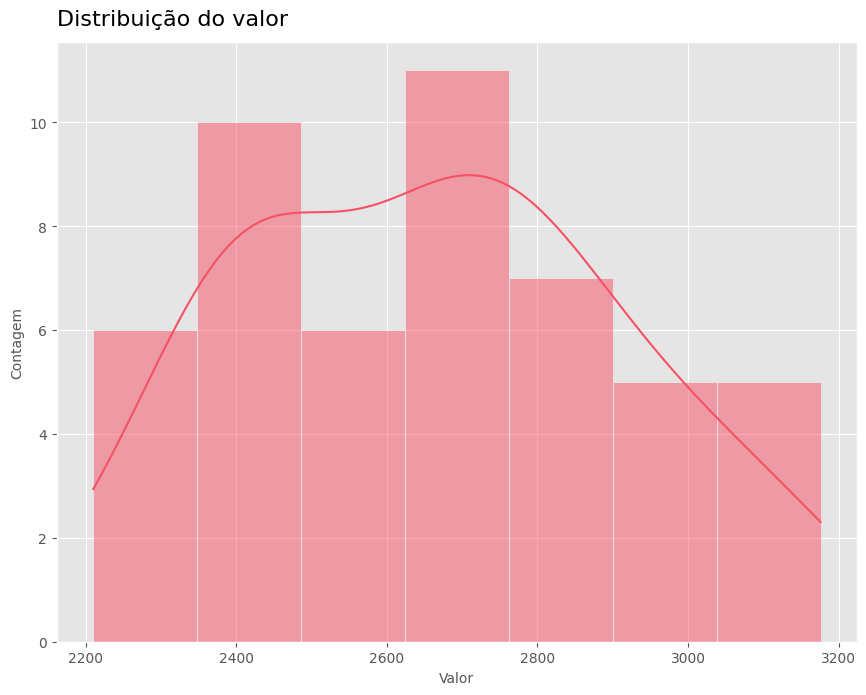

In [258]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.histplot(df_modelo, x = "Valor", kde = True, color = "#F65164")
ax.set_title("Distribuição do valor", loc = "left", fontsize = 16, pad = 12)
ax.set_xlabel("Valor", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
plt.show()

In [259]:
df_modelo.describe()

,_CustomerID,Recencia,Frequencia,Valor
count,50.00000,50.000000,50.00000,50.00000
mean,25.50000,5.100000,159.82000,2663.37080
std,14.57738,5.395576,14.23088,251.29131
min,1.00000,0.000000,135.00000,2210.09000
25%,13.25000,2.000000,151.25000,2436.21250
50%,25.50000,3.000000,157.50000,2666.38000
75%,37.75000,7.000000,167.75000,2826.41750
max,50.00000,28.000000,210.00000,3175.92000


A maior diferença entre os clientes está na recência e frequência de compras, os valores gastos na empresa estão em médias próximas.

# 4. Clusterização com K-Means

## 4.2. Pré-processamento de dados

### Aplicação do StandardScaler

In [264]:
from sklearn.preprocessing import StandardScaler

feature_cols = ["Recencia", "Frequencia", "Valor"]

standardized_data = df_modelo.copy()

scaler = StandardScaler()

scaler.fit(df_modelo[feature_cols])

standardized_features = scaler.transform(df_modelo[feature_cols])
standardized_data[feature_cols] = standardized_features

### Definindo o número de clusters através do método do cotovelo

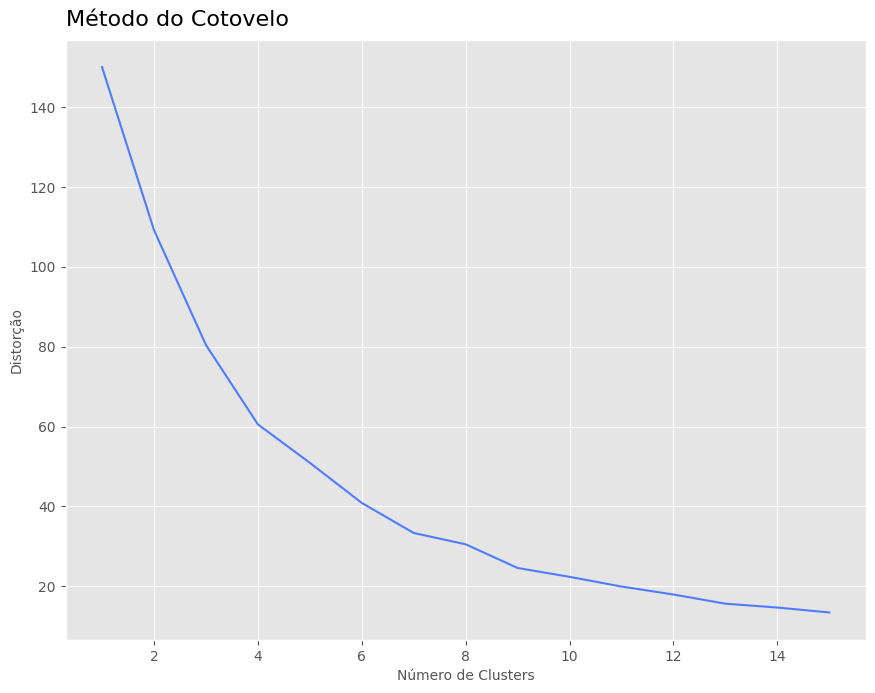

In [266]:
from sklearn.cluster import KMeans

data = standardized_data.iloc[:, [1, 2, 3]].values

k_range = range(1, 16)
distortions = []
k_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)
    k_values.append(k)

fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

plt.plot(k_values, distortions)
ax.set_title("Método do Cotovelo", loc = "left", fontsize = 16, pad = 10)
ax.set_xlabel("Número de Clusters", fontsize = 10)
ax.set_ylabel("Distorção", fontsize = 10)
plt.show()

O "cotovelo" da nossa curva indica que devemos utilizar 4 clusters.

## 4.2. Aplicação do KMeans

In [269]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(standardized_data[feature_cols])

df_modelo["Cluster"] = kmeans.labels_
df_modelo.head()

,_CustomerID,Recencia,Frequencia,Valor,Cluster
0,1,7,152,2210.09,2
1,2,7,135,2425.25,2
2,3,8,181,2575.80,1
3,4,3,167,3155.58,0
4,5,28,159,2802.72,3


### Boxplots dos Clusters

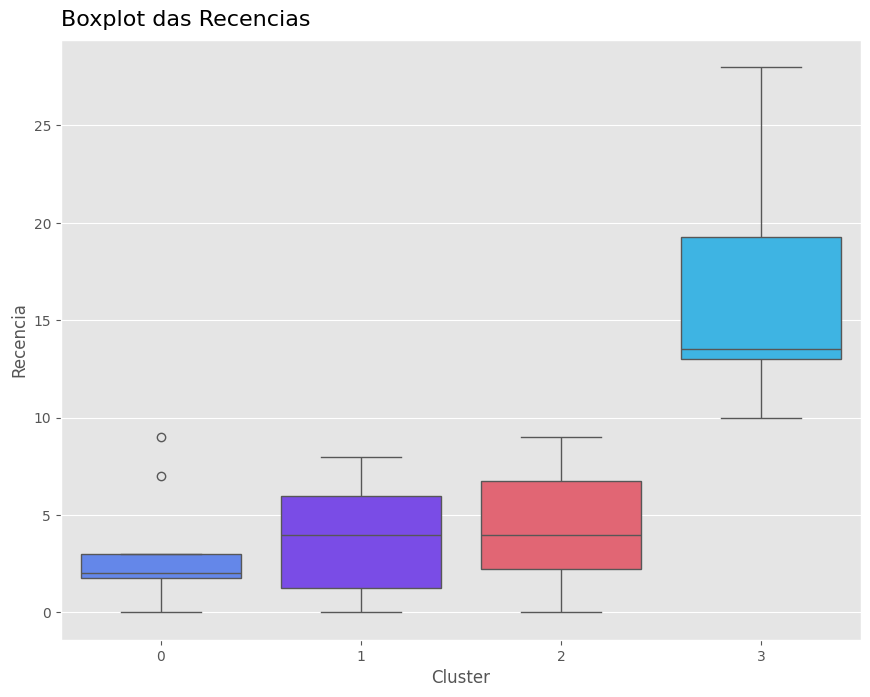

In [271]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df_modelo, x = "Cluster", y = "Recencia", palette = my_palette)
ax.set_title("Boxplot das Recencias", loc = "left", fontsize = 16, pad = 10)
plt.show()

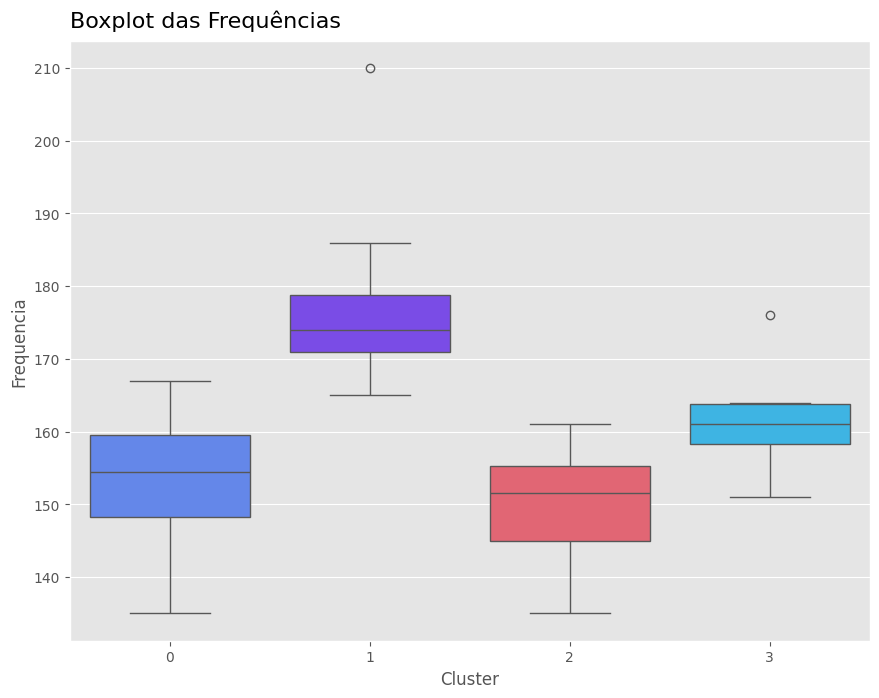

In [272]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df_modelo, x = "Cluster", y = "Frequencia", palette = my_palette)
ax.set_title("Boxplot das Frequências", loc = "left", fontsize = 16, pad = 10)
plt.show()

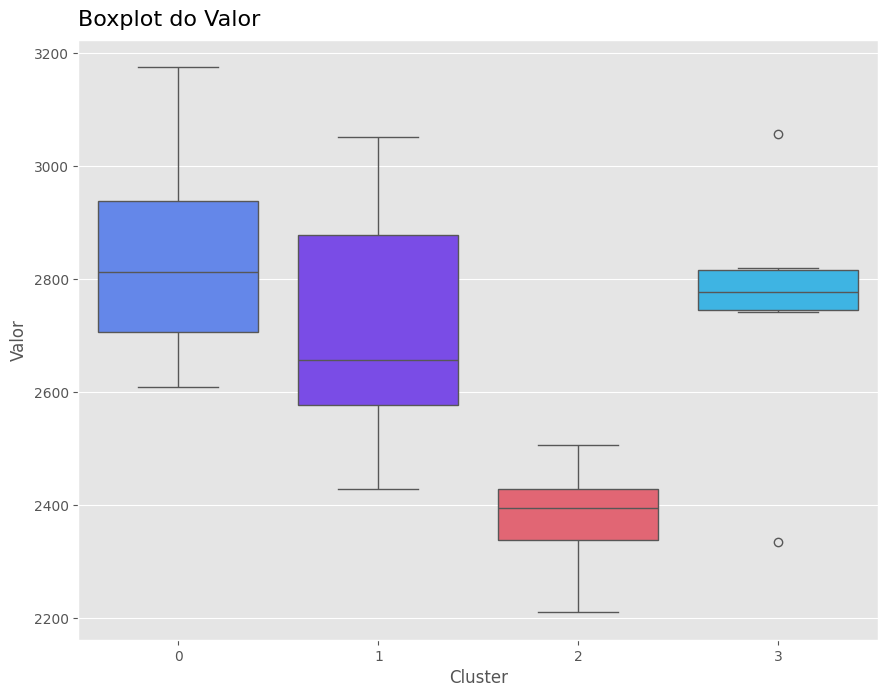

In [273]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df_modelo, x = "Cluster", y = "Valor", palette = my_palette)
ax.set_title("Boxplot do Valor", loc = "left", fontsize = 16, pad = 10)
plt.show()

### Definição da Segmentação

In [275]:
centroid_df = (
    df_modelo.groupby("Cluster")[["_CustomerID", "Recencia", "Frequencia", "Valor"]]
    .agg(
        {
            "_CustomerID": "nunique",
            "Recencia": "mean",
            "Frequencia": "mean",
            "Valor": "mean"
        }
    )
    .reset_index()
)

centroid_df = centroid_df.rename(columns = {"_CustomerID": "Número de Clientes"})

centroid_df.head()

,Cluster,Número de Clientes,Recencia,Frequencia,Valor
0,0,16,2.625000,153.000000,2844.886875
1,1,14,3.785714,176.571429,2701.735000
2,2,14,4.357143,150.000000,2379.587143
3,3,6,16.500000,161.833333,2751.973333


#### Os segmentos

- Cluster 0: Recência baixa, frequência média, valor muito alto. Clientes Potencialmente Leais.
- Cluster 1: Recência média, frequência muito alta, valor alto. Clientes Frequentes de Valor.
- Cluster 2: Recência alta, frequência baixa, valor baixo. Clientes de Retenção.
- Cluster 3: Recência muito alta, frequência alta, valor médio. Clientes Regulares.

In [277]:
def segment(value):
    if value == 0:
        return "Leal"
    elif value == 1:
        return "Valor"
    elif value == 2:
        return "Retenção"
    else:
        return "Regular"

In [278]:
df_modelo["Segmento"] = df_modelo["Cluster"].apply(segment)
df_modelo.drop(columns = "Cluster", axis = 1, inplace = True)
df_modelo.head()

,_CustomerID,Recencia,Frequencia,Valor,Segmento
0,1,7,152,2210.09,Retenção
1,2,7,135,2425.25,Retenção
2,3,8,181,2575.80,Valor
3,4,3,167,3155.58,Leal
4,5,28,159,2802.72,Regular


In [279]:
# Salvando o dataset para o time de marketing fazer análises e dashboards

df_modelo.to_csv("../data/processed/clientes_segmentados.csv", sep = ";", decimal = ",")

# 5. Insights e conclusões

## 5.1. Sobre os segmentos

Pensei nos segmentos da seguinte forma:

- Clientes potencialmente leais: podem estar explorando diferentes produtos dentro da empresa e têm potencial para se tornarem leais à nossa marca com o tempo. Ofertas personalizadas e outros meios de mantê-los engajados são importantes.
- Frequentes de valor: são aqueles regulares que constantemente consomem nossos serviços. Com estes, precisamos usar estratégias de fidelização, como programas de recompensas e descontos por recorrência.
- Clientes de retenção: possivelmente estão perdendo o interesse em nossa marca ou podem já ter encontrado outra opção. Para estes, precisamos buscar meios de reativação e incentivos para reacender a vontade de nos buscar.
- Clientes regulares: são fiéis à nossa marca e retornam com certa regularidade. Buscar recomendações baseadas em suas últimas compras pode ser uma forma de estimular mais compras. 

## 5.2. Sugestões para o time marketing

#### Para Clientes Potencialmente Leais

1. Campanhas de recomendações e descontos personalizados: Através de e-mail marketing, sugerir produtos relacionados ou que complementam as últimas compras, juntamente com cupons de desconto.
2. Programa de exclusividade: Oferecer acesso exclusivo a novos produtos no catálogo com certa antecedência.

#### Para Clientes Frequentes de Valor

1. Programa de fidelidade: Oferecer recompensas a partir de metas de consumo, como descontos especiais e brindes que remetam à nossa marca, assim como eventos para clientes dentro do programa, como dias com ofertas diferenciadas.

#### Para Clientes de Retenção

1. Campanhas de reativação: Envio de e-mails com descontos agressivos baseados nas últimas compras feitas ou oferecer descontos para as próximas compras.
2. Pesquisas de satisfação: Envio de e-mails com pesquisa de satisfação, para entender os motivos da inatividade, com desconto especial ao final do formulário.

#### Para Clientes Regulares

1. Promoções de recompensa por referência: Incentivar esses clientes a indicarem amigos ou familiares oferecendo recompensas especiais, como descontos ou brindes, para cada nova indicação bem-sucedida.

![img](https://images.unsplash.com/photo-1563986768609-322da13575f3?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

### 5.3. Conclusões

Ao concluir este projeto, podemos ver como, no caso do setor de marketing, a Análise RFV pode ser ponto chave para campanhas bem-sucedidas e bons resultados. Uma segmentação bem realizada permite a criação de campanhas de marketing com um direcionamento personalizado para cada tipo de cliente, dando um pouco de "alma" para cada campanha. A análise pode ser direcionada para diversos outros setores com fins diferentes, mas sempre entregando como resultado uma segmentação que permite trabalhar de forma ajustada e com menos espaços para erros causados por generalismos.